<a href="https://colab.research.google.com/github/deoa17/Analisis-de-sentiminto-de-tweets-usando-Tweepy-y-Nltk/blob/master/notebook_data_triathlon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consideraciones  generales
Para una correcta participación en la competencia **Data Thriatlon** sigue este formato de notebook propuestó por el equipo de data de Platzi. Esto ayudará en la calificación de tu notebook.

Secciones del notebook:

* Extracción de datos adicionales (0-20%)
* Limpieza y transformación de datos. (0-20%)
* Analisís exploratorio (*analytics, data visualization y storytelling*). (0-60%)
* Modelo (opcional).

*Para revisar las reglas de la competencia ve a este [blogpost](https://platzi.com/blog/olimpiadas-data-triathlon/).

# ¿Qué hay en los datos?

En los datos encontrarás información de las **exportaciones e importaciones de Colombia de 1962 a 2017**. Fueron extraídos del [OEC: The Observatory of Economic Complexity](https://legacy.oec.world/en/).

Tu labor será desarrollar un análisis exploratorio para encontrar insights valiosos a partir de esos datos y otros que recopiles.



## Preguntas

Para el desarrollo de tu análisis puedes resolver las siguientes preguntas:

1. ¿Cuál es el top 10 países a los que Colombia exporta sus productos y su evolución con respecto al tiempo?
2. ¿Cuál es el top 10 países de los que Colombia importa sus productos y su evolución con respecto al tiempo?
3. ¿Existe algún producto que debido a cambios económicos en la oferta/demanda halla causado un decremento en el volumen de dinero que se mueve con él?
4. ¿Cuáles sectores económicos tienen mayor importancia en las exportaciones de Colombia y por qué?

**También puedes resolver preguntas que a ti se te ocurran.**

# Extracción de datos adicionales (0-20%)

Para extraer información adicional a la proporcionada por Platzi puedes extraerla directamente de la fuente de datos original. El dataset cuenta con la información extraída del *OEC: The Observatory of Economic Complexity*, específicamente de la versión legacy la cual permite la descarga de archivos a partir de una URL y de la API expuesta por ellos.

- [https://legacy.oec.world/en/resources/data/](https://legacy.oec.world/en/resources/data/)
- [https://legacy.oec.world/api/](https://legacy.oec.world/api/)

**Para tu análisis recolecta más datos de esta y otras fuentes que veas necesarias.**

## 1. The first step, we need to have a look in all the data
I am looking forward to know what information have all this archives and how much data we are going to work in, so let's get started.

In [1]:
#I have already upload all the archives in my google drive 
from google.colab import drive
drive.mount('/content/drive/')

#We are going to use pandas to read the information
import pandas as pd
path = 'drive/MyDrive/Colab Notebooks/notebook_data_triathlon/'

Mounted at /content/drive/


In [2]:
#All the archives are delimited by "|" 
df_colombia_exports = pd.read_csv(path+'colombia_exports.csv', delimiter='|')
df_colombia_imports = pd.read_csv(path+'colombia_imports.csv', delimiter='|')
df_country_names = pd.read_csv(path+'country_names.csv', delimiter='|', index_col=0)
df_groups_sitc_rev2 = pd.read_csv(path+'groups_sitc_rev2.csv', delimiter='|', index_col=0)
df_groups_sitc_rev22 = pd.read_csv(path+'groups_sitc_rev2.csv', delimiter='|', index_col=0)
df_products_sitc_rev2 = pd.read_csv(path+'products_sitc_rev2.csv',delimiter='|', index_col=0)

In [3]:
#Let's have a look at the first rows of each archive
print(f'df_colombia_exports\n\n{df_colombia_exports.head()}\n')
print(f'df_colombia_imports\n\n{df_colombia_imports.head()}\n')
print(f'df_country_names\n\n{df_country_names.head()}\n')
print(f'df_groups_sitc_rev2\n\n{df_groups_sitc_rev2.head()}\n')
print(f'df_products_sitc_rev2\n\n{df_products_sitc_rev2.head()}\n')


df_colombia_exports

   Unnamed: 0  year origin dest  sitc4  export_val  import_val
0      761444  1962    col  civ    712         0.0     13000.0
1      761445  1962    col  civ   1210     12000.0         0.0
2      761446  1962    col  cod   2925         0.0      2000.0
3      761447  1962    col  cog   2925         0.0      2000.0
4      761448  1962    col  dza   1210    112000.0         0.0

df_colombia_imports

   Unnamed: 0  year origin dest  sitc4  export_val  import_val
0       11564  1962    civ  col    712     13000.0         0.0
1       11565  1962    civ  col   1210         0.0     12000.0
2       17741  1962    cod  col   2925      2000.0         0.0
3       20216  1962    cog  col   2925      2000.0         0.0
4       25005  1962    dza  col   1210         0.0    112000.0

df_country_names

      id id_3char          name
0  afago      ago        Angola
1  afbdi      bdi       Burundi
2  afben      ben         Benin
3  afbfa      bfa  Burkina Faso
4  afbwa      bwa     

##Some insights that I could find in each archive
After taking a brief review of all the data we can analyze each archive and describe what information bring us

1. **df_colombia_exports**: This is the information for all the exports from Colombia to all the different countries. These are the variables of each column:

 * **Unnamed:** This column doesn't have a name and by default, pandas call it 'Unnamed'. At this moment I don't know what represents this column because it doesn't have any relationship with the other archives, so we are going to need to review the resource data and extract additional data.
 * **year:** This column represents the year of the export.
 * **origin:** This column is written with some key that represents the country that exports the products (In this case Colombia), the value of the key is in the *'df_country_names'* archive.
 * **dest:** It is the same as the 'origin' column but this represents the country that imports the products
 * **sitc4:** Standard International Trade Classification (SITC) is a classification of goods used to classify the exports and imports of a country to enable comparing different countries and years. In the *'df_products_sitc_rev2'* archive we could find the value of the key.
 * **export_val:** Total amount of exports for each year
 * **import_val:** Total amount of imports for each year (This column has to be just in the 'df_colombia_export')
2. **df_colombia_imports:** This is the information for all the imports from all the different countries to Colombia. It has the same columns of *'df_colombia_exports'* archive and we can see that there is duplicated information that we are going to clean in the next chapter.

3. **df_country_names:** In this archive, we can find the key-value for all the countries

4. **df_groups_sitc_rev2:** In this archive, we can find some groups of aggregations of the SITC classification but we do not have any column to merge these values ​​with a dataframe. So we are going to seek further information.

5. **df_products_sitc_rev2:** In this archive, we can find the key-value for all the SITC classification

##Let's seek for further information
**I could not find the relation between the dataframe 'df_groups_sitc_rev2' and the others dataframes.**

On the web https://wits.worldbank.org/witsapiintro.aspx?lang=en I could found that represent the 'Trade Statistics by Product (HS 6-digit)' but I can not relate with the SICT classification

# Limpieza y transformación de datos (0-20%)

Para la limpieza de datos puedes utilizar herramientas como Pandas y numpy con el fin de limpiar y estructurar todo tipo de datos nulos o vacíos que no sean necesarios para el análisis de los datos requeridos.

In [4]:
def FindDiff(df1,df2):
  """Join two dataframes, removing repeating data and other things
  """
  df1_str_tuples = df1.astype(str).apply(tuple, 1)
  df2_str_tuples = df2.astype(str).apply(tuple, 1)
  df1_values_in_df2_filter = df1_str_tuples.isin(df2_str_tuples)
  df2_values_in_df1_filter = df2_str_tuples.isin(df1_str_tuples)
  df1_values_not_in_df2 = df1[~df1_values_in_df2_filter]
  df1_values_in_df2 = df1[df1_values_in_df2_filter]
  df2_values_not_in_df1 = df2[~df2_values_in_df1_filter]
  frames = [df1_values_in_df2 , df1_values_not_in_df2 , df2_values_not_in_df1]
  result = pd.concat(frames)
  result=result[['year',"dest","sitc4","export_val","import_val"]]
  return result
def TransProdId(Text):
    #Extract Code of ID
    Salida=int(str(Text)[2:4])
    return Salida
def MergeProductsGroups(Products,Groups):
  Products['GroupCat']=Products['id'].apply(TransProdId)
  Products_Groups = pd.merge(Products, Groups, left_on='GroupCat', right_on='id',how="left")
  result = Products_Groups[['category',"name","sitc"]]
  result = result.fillna(value="No Category Specific")
  return result
def MergeAllData(result,Products_Groups,Names_Country):
  result2=pd.merge(result,Products_Groups, left_on='sitc4', right_on='sitc',how="left")
  result2=result2[["year",'dest',"export_val","import_val","category","name"]]
  result3=pd.merge(result2, Names_Country, left_on='dest', right_on='id_3char',how="left")
  result3=result3[["year","export_val","import_val","category","name_x","name_y","id_3char"]]
  result3.columns=["Year","Export Value","Import Value","Category","Product","Country","id_3char"]
  result3 = result3.fillna(value="No Country Specific")
  return result3
def ClearData(result):
  R2=result[result['Country'] !="World"]
  R3=R2[R2['Product'] != "Unclassified Transactions"]
  R3=R3[~R3['Country'].isna()]
  return R3
def Tables_Pivot(Data,Values,Index):
  Pivot = pd.pivot_table(Data, values=Values, index=Index, aggfunc=np.sum).sort_values(by=Values, ascending=False)[:10]
  return Pivot.index,Pivot
def PlotArea(Data,Values,Index,IndexGraph,Titles,graph=3):
  a,b =Tables_Pivot(Data,Values,Index)
  c=Data[Data[Index[0]].isin(a)]
  if graph > 2 or graph==1:
    pd.pivot_table(c, values=Values, columns=Index,index=IndexGraph, aggfunc=np.sum).plot.area(figsize=(17,5),title=Titles[0])
  c=pd.pivot_table(c, values=Values, columns=Index,index=IndexGraph, aggfunc=np.sum)
  e=c.sum(axis = 1)
  if graph > 2 or graph==2:
    c.div(e,axis='index').plot.area(figsize=(17,5),title=Titles[1])
  


In [5]:
df=df_groups_sitc_rev22.append({'id' : 1 , 'category' : 'asdads'} , ignore_index=True)

In [9]:
result = FindDiff(df_colombia_exports, df_colombia_imports)
result

,year,dest,sitc4,export_val,import_val
110188,1979,col,9310,1382000.0,1382000.0
118939,1980,col,7821,20000.0,20000.0
118940,1980,col,9310,350000.0,350000.0
439383,2003,col,6251,654300.0,654300.0
439384,2003,col,6289,8970.0,8970.0
...,...,...,...,...,...
775897,2017,col,6658,8658.0,NaN
775898,2017,col,8924,NaN,4285.5
775899,2017,col,8928,3816.5,25667.5
775900,2017,col,8972,500.0,5306.0


In [7]:
groups = MergeProductsGroups(df_products_sitc_rev2, df_groups_sitc_rev2)
groups

,category,name,sitc
0,Plastics in primary forms,Initiating Devices,5722
1,Plastics in non-primary forms,Polymerization Ion Exchangers,5838
2,"Rubber manufactures, n.e.s.","Rubber tires, tire cases, inner and flaps, for...",6250
3,"Rubber manufactures, n.e.s.",Car Tires,6251
4,"Rubber manufactures, n.e.s.",Other articles of rubber,6280
...,...,...,...
983,No Category Specific,Unclassified Transactions,9310
984,No Category Specific,Miscellaneous Live Animals,9410
985,"Coin (other than gold coin), not being legal t...",Non-Gold Coin,9610
986,Live animals other than animals of division 03,Live animals chiefly for food,10


In [8]:
all_data = MergeAllData(result, groups, df_country_names)
all_data

,Year,Export Value,Import Value,Category,Product,Country,id_3char
0,1979,1.382e+06,1.382e+06,No Category Specific,Unclassified Transactions,Colombia,col
1,1980,20000,20000,Road vehicles,Trucks and Vans,Colombia,col
2,1980,350000,350000,No Category Specific,Unclassified Transactions,Colombia,col
3,2003,654300,654300,"Rubber manufactures, n.e.s.",Car Tires,Colombia,col
4,2003,8970,8970,"Rubber manufactures, n.e.s.",Miscellaneous Rubber,Colombia,col
...,...,...,...,...,...,...,...
1573613,2017,8658,No Country Specific,"Non metallic mineral manufactures, n.e.s.",Miscellaneous Articles of Glass,Colombia,col
1573614,2017,No Country Specific,4285.5,"Miscellaneous manufactured articles, n.e.s.",Cards and Decals,Colombia,col
1573615,2017,3816.5,25667.5,"Miscellaneous manufactured articles, n.e.s.",Miscellaneous Printed Matter,Colombia,col
1573616,2017,500,5306,"Miscellaneous manufactured articles, n.e.s.",Imitation Jewellery,Colombia,col


## Dataframe with just the export information

In [ ]:
#Let's drop all the rows whith import information
df_colombia_exports.drop(df_colombia_exports[df_colombia_exports['import_val'] > 0].index, inplace = True) 

#Let's drop the column with import information and the first column that doesn't relate with  any information in the dataframes
df_colombia_exports= df_colombia_exports.drop(columns=['Unnamed: 0','import_val'])

In [ ]:
# There are no Null values
df_colombia_exports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214718 entries, 1 to 799402
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        214718 non-null  int64  
 1   origin      214718 non-null  object 
 2   dest        214718 non-null  object 
 3   sitc4       214718 non-null  int64  
 4   export_val  214718 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.8+ MB


In [ ]:
df_country_names = df_country_names.drop(columns=['id'])
df_country_names = df_country_names.rename(columns={'id_3char':'origin'})

df_colombia_exports = df_colombia_exports.merge(df_country_names, on=['origin'] ,how="left")
df_colombia_exports = df_colombia_exports.rename(columns={'name':'country_origin'})

In [ ]:
df_country_names['dest'] = df_country_names['origin']

df_colombia_exports = df_colombia_exports.merge(df_country_names, on=['dest'] ,how="left")
df_colombia_exports = df_colombia_exports.rename(columns={'name':'country_dest'})

In [ ]:
df_colombia_exports = df_colombia_exports.drop(columns=['origin_x', 'dest', 'origin_y'])

In [ ]:
df_products_sitc_rev2 = df_products_sitc_rev2.rename(columns={'sitc':'sitc4'})
df_products_sitc_rev2 = df_products_sitc_rev2.drop(columns=['id'])

df_colombia_exports = df_colombia_exports.merge(df_products_sitc_rev2, on=['sitc4'] ,how="left")
df_colombia_exports = df_colombia_exports.drop(columns=['sitc4'])

df_colombia_exports

,year,export_val,country_origin,country_dest,name
0,1962,12000.0,Colombia,Cote d'Ivoire,Tobacco unmanufactured; tobacco refuse
1,1962,112000.0,Colombia,Algeria,Tobacco unmanufactured; tobacco refuse
2,1962,6000.0,Colombia,Egypt,Non-Coniferous Sawlogs
3,1962,164000.0,Colombia,Morocco,Tobacco unmanufactured; tobacco refuse
4,1962,5000.0,Colombia,Morocco,Coffee
...,...,...,...,...,...
214713,2017,179559.5,Colombia,Uruguay,Coffee
214714,2017,84909.0,Colombia,Uruguay,Uncarded Discontinuous Synthetic Fibers
214715,2017,486.0,Colombia,Uruguay,Notebooks
214716,2017,26526.5,Colombia,Uruguay,Mineral Wool


## Dataframe with just the import information


In [ ]:
#Let's drop all the rows whith import information
df_colombia_imports.drop(df_colombia_imports[df_colombia_imports['export_val'] > 0].index, inplace = True) 

#Let's drop the column with import information and the first column that doesn't relate with  any information in the dataframes
df_colombia_imports= df_colombia_imports.drop(columns=['Unnamed: 0','export_val'])

In [ ]:
# There are no Null values
df_colombia_imports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215410 entries, 1 to 775898
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        215410 non-null  int64  
 1   origin      215410 non-null  object 
 2   dest        215410 non-null  object 
 3   sitc4       215410 non-null  int64  
 4   import_val  215410 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [ ]:
df_country_names = df_country_names.drop(columns=['dest'])

df_colombia_imports = df_colombia_imports.merge(df_country_names, on=['origin'] ,how="left")
df_colombia_imports = df_colombia_imports.rename(columns={'name':'country_origin'})

In [ ]:
df_country_names['dest'] = df_country_names['origin']

df_colombia_imports = df_colombia_imports.merge(df_country_names, on=['dest'] ,how="left")
df_colombia_imports = df_colombia_imports.rename(columns={'name':'country_dest'})

In [ ]:
df_colombia_imports = df_colombia_imports.drop(columns=['origin_x', 'dest', 'origin_y'])

In [ ]:
df_colombia_imports = df_colombia_imports.merge(df_products_sitc_rev2, on=['sitc4'] ,how="left")
df_colombia_imports = df_colombia_imports.drop(columns=['sitc4'])

df_colombia_imports

,year,import_val,country_origin,country_dest,name
0,1962,12000.0,Cote d'Ivoire,Colombia,Tobacco unmanufactured; tobacco refuse
1,1962,112000.0,Algeria,Colombia,Tobacco unmanufactured; tobacco refuse
2,1962,6000.0,Egypt,Colombia,Non-Coniferous Sawlogs
3,1962,164000.0,Morocco,Colombia,Tobacco unmanufactured; tobacco refuse
4,1962,5000.0,Morocco,Colombia,Coffee
...,...,...,...,...,...
215405,2017,179559.5,Uruguay,Colombia,Coffee
215406,2017,84909.0,Uruguay,Colombia,Uncarded Discontinuous Synthetic Fibers
215407,2017,486.0,Uruguay,Colombia,Notebooks
215408,2017,26526.5,Uruguay,Colombia,Mineral Wool


# Análisis exploratorio (*analytics, data visualization y storytelling* (0-60%)

El análisis exploratorio es parte fundamental para responder las preguntas propuestas por el equipo de data scientists de Platzi. 

* Mantén un código, visualizaciones y storytelling ordenados. 
* Muestra gráficas inline haciendo uso de herramientas como Matplotlib, Seaborn y otras. 
* En el storytelling la narrativa y la visualización deben tener sentido, procura que las gráficas sean visibles, aporten valor a responder las preguntas y sean lo más descriptivas posibles. 
* Además agrega textos que faciliten la narrativa del storytelling.

##Questiion 1: What is the top 10 countries to which Colombia exports its products and their evolution over time?

In [ ]:
df_colombia_exports.astype({'export_val':'int32'})

In [ ]:
top_10_exports = df_colombia_exports.groupby(['country_dest']).agg({'export_val': 'sum'})

In [ ]:
top_10_exports = top_10_exports.reset_index().sort_values('export_val',ascending=False).head(10)

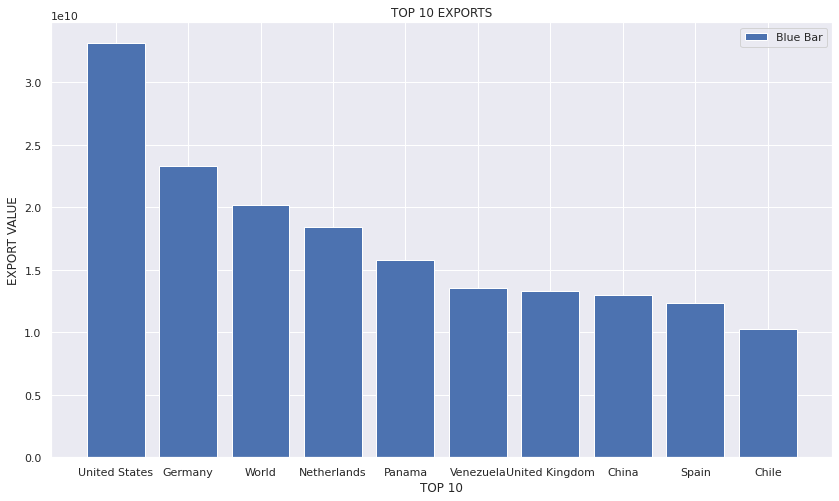

In [ ]:
import matplotlib.pyplot as plt

plt.bar(top_10_exports['country_dest'], top_10_exports['export_val'], label="Blue Bar", color='b')
plt.plot()

plt.xlabel("TOP 10")
plt.ylabel("EXPORT VALUE")
plt.title("TOP 10 EXPORTS")
plt.legend()
plt.show()

##Question 2: What is the top 10 countries from which Colombia imports its products and their evolution over time?

In [ ]:
top_10_imports = df_colombia_imports.groupby(['country_origin']).agg({'import_val': 'sum'})

In [ ]:
top_10_imports = top_10_imports.reset_index().sort_values('import_val',ascending=False).head(10)

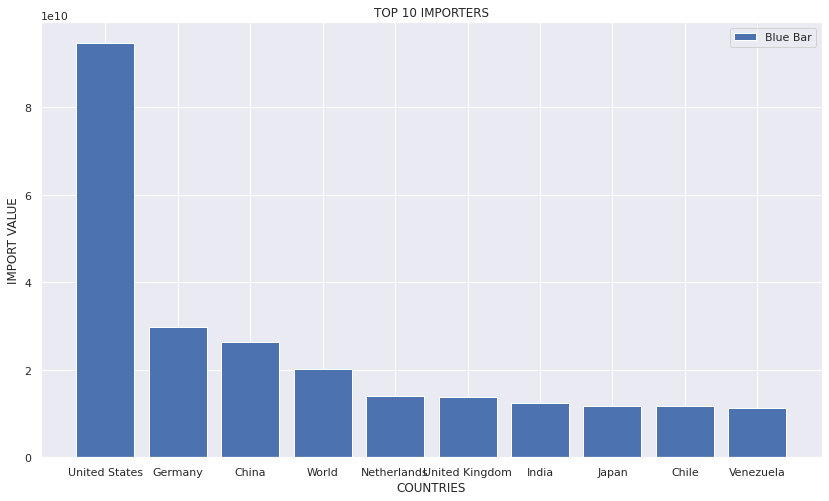

In [ ]:
plt.bar(top_10_imports['country_origin'], top_10_imports['import_val'], label="Blue Bar", color='b')
plt.plot()

plt.xlabel("COUNTRIES")
plt.ylabel("IMPORT VALUE")
plt.title("TOP 10 IMPORTERS")
plt.legend()
plt.show()

##Question 3: Is there a product that, due to economic changes in supply / demand, has caused a decrease in the volume of money that moves with it?



## **time is over**


##Question4: Which economic sectors are most important in Colombia's exports and why?

In [ ]:
top_sectors = df_colombia_exports.groupby(['name']).agg({'export_val': 'sum'})

In [ ]:
top_sectors = top_sectors.reset_index().sort_values('export_val',ascending=False).head(20)

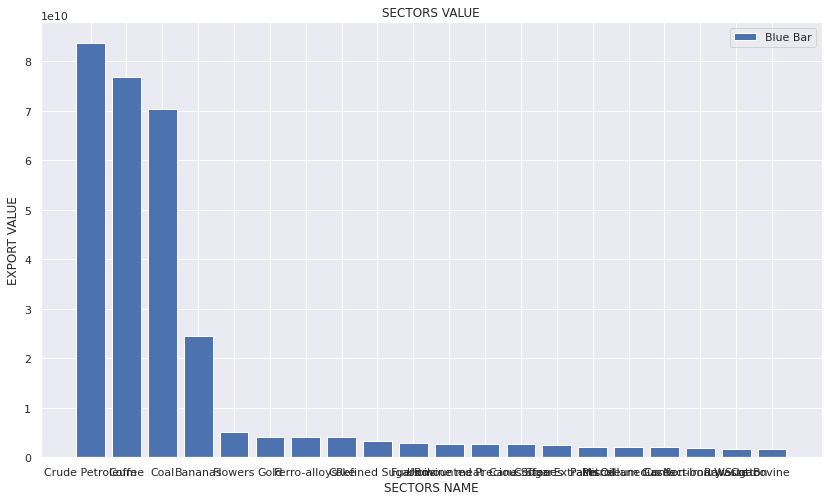

In [ ]:
plt.bar(top_sectors['name'], top_sectors['export_val'], label="Blue Bar", color='b')
plt.plot()

plt.xlabel("SECTORS NAME")
plt.ylabel("EXPORT VALUE")
plt.title("SECTORS VALUE")
plt.legend()
plt.show()

In [ ]:
topSector = top_sectors.head(4)
topSector

,index,name,export_val
0,146,Crude Petroleum,8.370031e+10
1,114,Coffee,7.688996e+10
2,104,Coal,7.030875e+10
3,43,Bananas,2.445966e+10


In [ ]:
sum_export
print(f'Export Total: {sum_export}')

top4 = topSector['export_val'].sum()
print(f'Export Total of Crude, Coffe, Coal and Bananas: {top4}')

print(f'This four represent: {(top4/sum_export)*100}')


Export Total: 816821769232.0
Export Total of Crude, Coffe, Coal and Bananas: 255358668935.5
This four represent: 31.262471025422812


###The top sector are Crude Petroleum, Coffe, Coal and Bananas.

This 4 sectors represents the 31% of all the exports

# Modelo (opcional)

Si necesitas agregar un modelo para mejorar tu análisis hazlo en esta sección del notebook. **La evaluación será contada como parte del análisis exploratorio y es completamente opcional**.

- En el desarrollo del modelo se requiere una organización del código y la estructuración del propio modelo. Las celdas que ejecuten entrenamientos o búsqueda de parámetros deben estar con **verbose 0**, esto con el fin de no ensuciar la salida de código y agilizar su revisión.



## **time is over**